#**Cat vs Dog Image Classification using Convolutional Neural Networks (CNN)**

##**Project Description**
###This project aims to build a deep learning model based on Convolutional Neural Networks (CNN) that can classify images as either cats or dogs. The model is trained using the Cats vs Dogs dataset from TensorFlow Datasets and is then tested with new images to evaluate the accuracy of the predictions.

### **1. Import Library**

In [29]:
# Install or upgrade JAX and JAXLIB libraries
!pip install --upgrade jax jaxlib

# Import necessary libraries
import tensorflow as tf  # TensorFlow library for deep learning
import tensorflow_datasets as tfds  # Library to load datasets
import matplotlib.pyplot as plt  # Library for plotting images
from tensorflow import keras  # High-level API for building models
from tensorflow.keras import layers  # Layers for building neural networks
import numpy as np  # Library for numerical operations

###**2. Load dataset**

In [31]:
# Load the chats vs dogs dataset from TenserFlow Datasets
dataset_name = "cats_vs_dogs"

# Load the dataset and also retrieve indo about the dataset
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

###**3. Split Dataset**

In [30]:
# Select 20,000 images from the training dataset for training
train_dataset = dataset['train'].take(20000)

# Skip the first 20,000 images and use the rest for validation
validation_dataset = dataset['train'].skip(20000)

# Function to preprocess images (resize and normalize)
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150)) / 255.0  # Resize the image to 150x150 and normalize pixel values to [0, 1]
    return image, label

# Apply preprocessing to the training dataset, batch the data in batches of 32, and shuffle the dataset
train_dataset = train_dataset.map(preprocess).batch(32).shuffle(1000)

# Apply preprocessing to the validation dataset and batch the data in batches of 32
validation_dataset = validation_dataset.map(preprocess).batch(32)

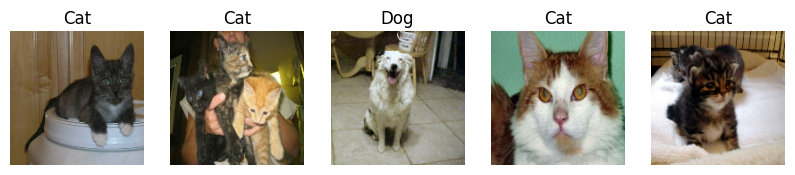

In [4]:
import matplotlib.pyplot as plt

# Display a few sample images from the dataset
def show_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visualization
    for i, (image, label) in enumerate(dataset.take(num_samples)):  # Take 'num_samples' from the dataset
        plt.subplot(1, num_samples, i+1)  # Create a subplot for each image
        plt.imshow(image) # Display the image
        plt.title("Cat" if label.numpy() == 0 else "Dog") # Show title based on the label (0 for cat, 1 for dog)
        plt.axis("off") # Hide the axes for a cleaner image view
    plt.show() # Display the plot with all the sample images

# Display sample images from the training dataset
show_samples(train_dataset.unbatch())

###**4.  CNN Model**

In [5]:
# Build a Convolutional Neural Network (CNN) model using Keras Sequential API
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(train_dataset, epochs=7, validation_data=validation_dataset)

# Evaluate the model performance on the validation dataset after training
test_loss, test_acc = model.evaluate(validation_dataset)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1061s 2s/step - accuracy: 0.5471 - loss: 0.6858 - val_accuracy: 0.6475 - val_loss: 0.6183
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.6977 - loss: 0.5675 - val_accuracy: 0.7554 - val_loss: 0.4970
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1049s 2s/step - accuracy: 0.7902 - loss: 0.4497 - val_accuracy: 0.8078 - val_loss: 0.4027
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.8384 - loss: 0.3554 - val_accuracy: 0.8519 - val_loss: 0.3281
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1059s 2s/step - accuracy: 0.8851 - loss: 0.2715 - val_accuracy: 0.8700 - val_loss: 0.3164
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1085s 2s/step - accuracy: 0.9155 - loss: 0.2081 - val_accuracy: 0.8654 - val_loss: 0.3121
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1054s 2s/step - accuracy: 0.9363 - loss: 0.1603 - val_accuracy: 0.8924 - val_loss: 0.2993
102/102 ━━━━━━━━━━━━━━━━━━━━ 66s 454ms/step - accuracy: 0.8810 - loss: 0.3063
Test accuracy: 0.89

###**5. Grafik  accuracy and loss**

Text(0.5, 1.0, 'Training & Validation Accuracy')

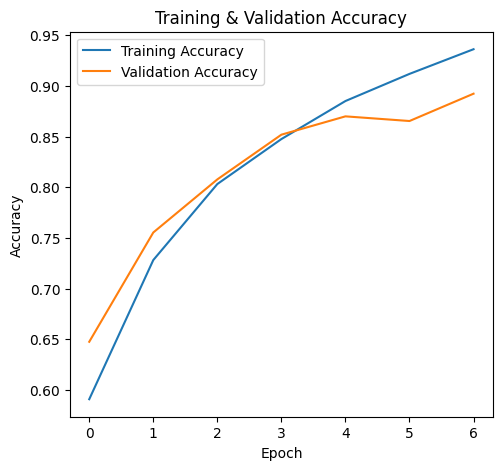

In [7]:
# Training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

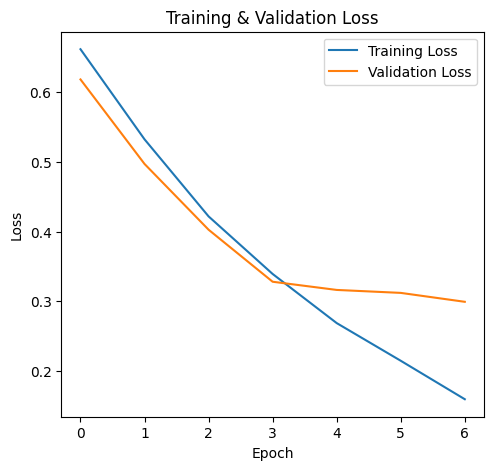

In [8]:
# Training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

###**Try on classification image**

Saving kucing.jpg to kucing (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted: Cat


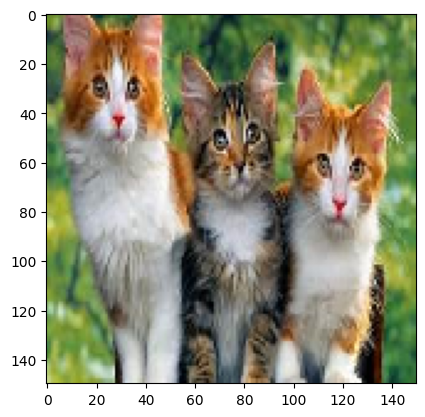

In [27]:
# Test using images
from google.colab import files # For uploading files in Google Colab
from keras.preprocessing import image # For image preprocessing
import matplotlib.pyplot as plt  # For displaying images
import matplotlib.image as mpimg # For handling image files
%matplotlib inline # Ensures images are displayed inline in a Colab notebook

uploaded = files.upload() # Upload images from local system (works in Google Colab)

# Loop over all uploaded files
for fn in uploaded.keys():

  # Get the file path
  path = fn
  img = image.load_img(path, target_size =(150,150))  # Load the image
  imgplot = plt.imshow(img)  # Display the image
  x = image.img_to_array(img)  # Convert the image
  x = np.expand_dims(x, axis=0) # Add an extra dimension to make it compatible with the model

  images = np.vstack([x]) # Stack the image array to create a batch
  classes = model.predict(images, batch_size=10) #Use the trained model to predict the class of the image

# Check the prediction result
if 0.4 < classes[0][0] < 0.6:
    print("Model tidak yakin, mungkin ini bukan kucing atau anjing.")
else:
    class_label = "Dog" if classes[0][0] > 0.5 else "Cat"
    print(f"Predicted: {class_label}")